In [1]:
import pandas as pd
import sqlite3 as sql3
import matplotlib.pyplot as plt
import seaborn as sns
# The sqlite3 module in Python is a built-in module 
# that provides an interface to interact with SQLite databases using Python code.
database = 'sql-murder-mystery.db'
conn = sql3.connect(database)

C:\Users\AMINA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\AMINA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\AMINA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# show all tables in this database
tables_query = "SELECT name FROM sqlite_master WHERE type='table'"

tables_df = pd.read_sql_query(tables_query, conn)
print(tables_df)

                     name
0      crime_scene_report
1         drivers_license
2                  person
3  facebook_event_checkin
4               interview
5      get_fit_now_member
6    get_fit_now_check_in
7                  income
8                solution


EDA FOR CRIME_SCENE_REPORT

In [3]:
pd.set_option("display.max_colwidth", None)

# show all column in crime_scene_report table
showallcrime="""
SELECT *
FROM crime_scene_report;

"""
pd.read_sql_query(showallcrime,conn)

,date,type,description,city
0,20180115,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC
1,20180115,murder,Life? Dont talk to me about life.,Albany
2,20180115,murder,"Mama, I killed a man, put a gun against his head...",Reno
3,20180215,murder,REDACTED REDACTED REDACTED,SQL City
4,20180215,murder,Someone killed the guard! He took an arrow to the knee!,SQL City
...,...,...,...,...
1223,20180430,bribery,\n,Garden Grove
1224,20180430,fraud,‘Why not?’ said the March Hare.\n,Houma
1225,20180430,assault,\n,Fontana
1226,20180501,assault,"be NO mistake about it: it was neither more nor less than a pig, and she\n",Trenton


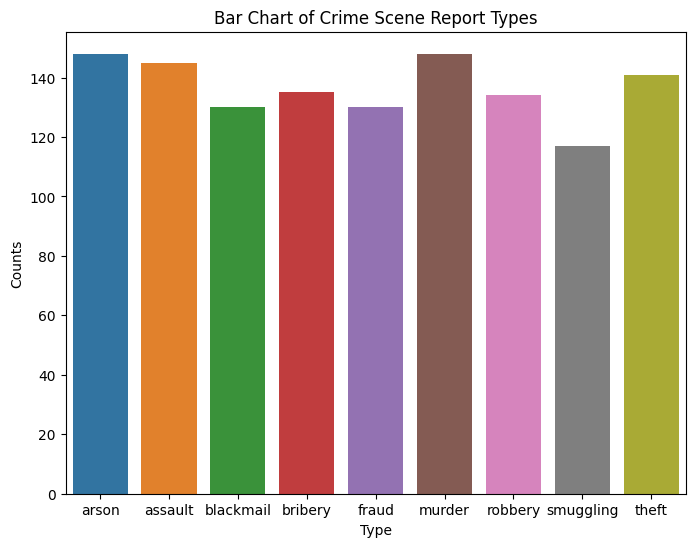

In [4]:
# Write your SQL query to retrieve the data from the 'crime_scene_report' table
showcrimetype = "SELECT type, COUNT(*) AS count FROM crime_scene_report GROUP BY type"

# Use pandas to execute the query and retrieve the data into a DataFrame
data = pd.read_sql_query(showcrimetype, conn)

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the bar chart using seaborn
sns.barplot(x='type', y='count', data=data)

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Counts')
plt.title('Bar Chart of Crime Scene Report Types')
plt.show()



In [5]:
# show list city which has murder crime, in this section we will show without counting how many cases is occur for each
showmurdercity="""
SELECT type, city
FROM crime_scene_report
WHERE type = 'murder'
"""
pd.read_sql_query(showmurdercity,conn)

,type,city
0,murder,Albany
1,murder,Reno
2,murder,SQL City
3,murder,SQL City
4,murder,Memphis
...,...,...
143,murder,St. Petersburg
144,murder,Appleton
145,murder,Toledo
146,murder,Spokane


In [6]:
# show total murder each cities
'''
this data shows total case occurrence for each cities. 
table shown below provide how to perform COUNT in type column and Group by City 
'''
showtype= """
SELECT COUNT(type) AS total_occurrence, city
FROM crime_scene_report
WHERE type='murder'
GROUP BY city
ORDER BY total_occurrence DESC
"""
pd.read_sql_query(showtype,conn)

# table shown below inform us that living in Vero Beach, SQL City, and Madison is more dangerous than others

,total_occurrence,city
0,3,Vero Beach
1,3,SQL City
2,3,Madison
3,2,Yonkers
4,2,Winter Haven
...,...,...
119,1,Appleton
120,1,Antioch
121,1,Amarillo
122,1,Albany


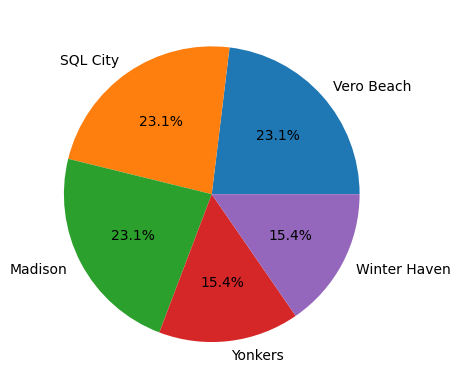

In [7]:
murderstat="""
SELECT COUNT(type) AS total_occurrence, city
FROM crime_scene_report
WHERE type='murder'
GROUP BY city
ORDER BY total_occurrence DESC
LIMIT 5

"""

# read and execute query
showmurderstat = pd.read_sql_query(murderstat, conn)

# create the pie chart
plt.pie(showmurderstat['total_occurrence'], labels=showmurderstat['city'], autopct='%1.1f%%')
plt.show()



EDA FOR DRIVERS_LICENSE

In [8]:
# show all column in drivers_license table
showalllicense="""
SELECT *
FROM drivers_license;

"""
pd.read_sql_query(showalllicense,conn)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,100280,72,57,brown,red,male,P24L4U,Acura,MDX
1,100460,63,72,brown,brown,female,XF02T6,Cadillac,SRX
2,101029,62,74,green,green,female,VKY5KR,Scion,xB
3,101198,43,54,amber,brown,female,Y5NZ08,Nissan,Rogue
4,101255,18,79,blue,grey,female,5162Z1,Lexus,GS
...,...,...,...,...,...,...,...,...,...
10002,999923,19,77,amber,black,female,5L0ZI4,GMC,Sierra 3500
10003,999940,71,61,green,green,male,1B8QN8,Mitsubishi,Eclipse
10004,999981,67,69,brown,blue,female,1684K3,Land Rover,LR2
10005,999986,49,58,green,grey,male,F8F64H,Lexus,LS


In [9]:
# show all data in car_make including the duplicate data

car_make_type="""
SELECT car_make
FROM drivers_license
"""

pd.read_sql_query(car_make_type, conn)

,car_make
0,Acura
1,Cadillac
2,Scion
3,Nissan
4,Lexus
...,...
10002,GMC
10003,Mitsubishi
10004,Land Rover
10005,Lexus


In [10]:
# show unique / specific / distinct value od car_make

car_make_type_distinct = """
SELECT DISTINCT car_make
FROM drivers_license
"""

pd.read_sql_query(car_make_type_distinct, conn)

,car_make
0,Acura
1,Cadillac
2,Scion
3,Nissan
4,Lexus
...,...
60,Panoz
61,Foose
62,Fiat
63,FIAT


In [11]:
# show distinct eye_color

eye_color="""
SELECT DISTINCT eye_color
FROM drivers_license
"""
pd.read_sql_query(eye_color, conn)

,eye_color
0,brown
1,green
2,amber
3,blue
4,black


In [12]:
# This code is just part of my learning session, there is no racism need to be considered
 

In [13]:
# show distinct hair_color

hair_color = """
SELECT DISTINCT hair_color
FROM drivers_license
"""

pd.read_sql_query(hair_color, conn)

,hair_color
0,red
1,brown
2,green
3,grey
4,blue
5,white
6,black
7,blonde


In [14]:
# show what kind of car production which is popular among the criminal 

car_popular = """
SELECT COUNT(car_make) as total_purchase, car_make
FROM drivers_license
GROUP BY car_make 
ORDER BY total_purchase DESC
LIMIT 15
"""
pd.read_sql_query(car_popular, conn)

,total_purchase,car_make
0,792,Chevrolet
1,764,Ford
2,570,Toyota
3,508,GMC
4,454,Dodge
5,394,BMW
6,353,Mercedes-Benz
7,335,Nissan
8,316,Lexus
9,313,Mazda


In [15]:
# show all atribute where car_make == chevrolet
chev_dist="""
SELECT *
FROM drivers_license
WHERE car_make IN ('Chevrolet')
LIMIT 20
"""

pd.read_sql_query(chev_dist, conn)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,101773,55,57,amber,black,female,VK5SOO,Chevrolet,Express 1500
1,102844,30,62,blue,blue,male,471TX3,Chevrolet,Trailblazer
2,106882,70,71,green,white,male,0764T6,Chevrolet,Suburban 1500
3,107867,48,50,amber,blue,male,FK47DF,Chevrolet,Monte Carlo
4,109100,70,64,amber,blue,male,8MRTMS,Chevrolet,Cavalier
5,109638,70,51,blue,brown,male,8S5B85,Chevrolet,Silverado 2500
6,109904,67,62,green,black,male,PCS055,Chevrolet,Tahoe
7,110373,52,62,green,green,male,636327,Chevrolet,Silverado
8,110484,85,59,green,brown,male,8AB31Y,Chevrolet,Colorado
9,110991,25,59,amber,black,male,75Q187,Chevrolet,Classic
